<a href="https://colab.research.google.com/github/jumli-gazali/diagnese/blob/jumli/Diagnese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ZIP

In [ ]:
#!wget -O Dataset.zip https://raw.githubusercontent.com/jumli-gazali/diagnese/blob/main/Dataset.zip
import zipfile

# Unzip the archive
local_zip = './Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

#1. Import Library

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf

#2. Download dan Load Dataset

In [19]:
!wget -O Training.csv https://raw.githubusercontent.com/jumli-gazali/diagnese/main/Training.csv
!wget -O Testing.csv https://raw.githubusercontent.com/jumli-gazali/diagnese/main/Testing.csv

--2023-05-29 03:31:56--  https://raw.githubusercontent.com/jumli-gazali/diagnese/main/Training.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1359835 (1.3M) [text/plain]
Saving to: ‘Training.csv’

Training.csv        100%[===================>]   1.30M  --.-KB/s    in 0.03s   

2023-05-29 03:31:57 (37.3 MB/s) - ‘Training.csv’ saved [1359835/1359835]

--2023-05-29 03:31:57--  https://raw.githubusercontent.com/jumli-gazali/diagnese/main/Testing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13939 (14K) [text/plain]
Saving t

In [20]:
#read training data csv with header = 0 and delimiter = ;
df = pd.read_csv('Training.csv', header=0, delimiter=';')


#3. Data Exploration

In [21]:
#check dimension data
df.shape

(4920, 132)

In [22]:
#check empty cell
data = pd.DataFrame(df)

# Memeriksa apakah terdapat sel yang tidak berisi (NULL/NaN)
cek_null = data.isnull().any().any()

if cek_null:
    print("Terdapat sel yang tidak berisi dalam DataFrame.")
else:
    print("Tidak terdapat sel yang tidak berisi dalam DataFrame.")

Tidak terdapat sel yang tidak berisi dalam DataFrame.


In [24]:
#check 5 head data
df.head(10)

,gatal,ruam_kulit,benjolan_pada_kulit,bersin-bersin,menggigil,merinding,nyeri_sendi,sakit_perut,asam_lambung,sariawan,...,komedo,menggaruk,pengelupasan_kulit,kulit_bersisik,celah_kecil_pada_kuku,peradangan_kuku,kulit_melepuh,luka_merah_di_sekitar_hidung,bekas_luka_berair,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal


In [25]:
#get summary from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 132 entries, gatal to prognosis
dtypes: int64(131), object(1)
memory usage: 5.0+ MB


In [26]:
col_names = df.columns
for col in col_names:
    
    print(df[col].value_counts())   

0    4242
1     678
Name: gatal, dtype: int64
0    4134
1     786
Name: ruam_kulit, dtype: int64
0    4812
1     108
Name: benjolan_pada_kulit, dtype: int64
0    4698
1     222
Name: bersin-bersin, dtype: int64
0    4812
1     108
Name: menggigil, dtype: int64
0    4122
1     798
Name: merinding, dtype: int64
0    4236
1     684
Name: nyeri_sendi, dtype: int64
0    4698
1     222
Name: sakit_perut, dtype: int64
0    4698
1     222
Name: asam_lambung, dtype: int64
0    4812
1     108
Name: sariawan, dtype: int64
0    4812
1     108
Name: otot_mengecil, dtype: int64
0    3006
1    1914
Name: muntah, dtype: int64
0    4704
1     216
Name: panas_saat_buang_air_kecil, dtype: int64
0    4812
1     108
Name: keluar_darah_buang_air_kecil, dtype: int64
0    2988
1    1932
Name: kelelahan, dtype: int64
0    4806
1     114
Name: kenaikan_berat_badan, dtype: int64
0    4806
1     114
Name: anxiety, dtype: int64
0    4806
1     114
Name: tangan_dan_kaki_dingin, dtype: int64
0    4692
1     228
Name

<ipython-input-31-2eed02536562>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df.mean()


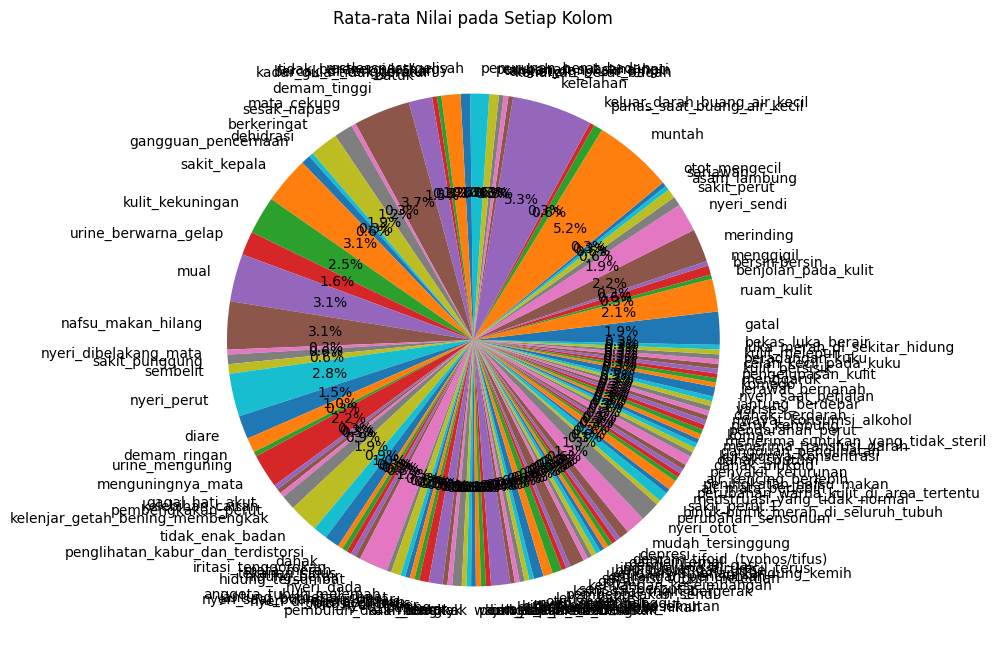

In [31]:
import matplotlib.pyplot as plt

# Menghitung rata-rata setiap kolom
mean_values = df.mean()

# Membuat gambar
plt.figure(figsize=(8, 8))  # Ukuran gambar dapat disesuaikan
plt.pie(mean_values, labels=mean_values.index, autopct='%1.1f%%')
plt.title("Rata-rata Nilai pada Setiap Kolom")
plt.show()


In [32]:
df['prognosis'].value_counts()

Vertigo Posisional Paroksismal    120
Hepatitis C                       120
Hepatitis E                       120
Hipertensi                        120
Hipertiroidisme                   120
Hipoglikemia                      120
Hipotiroidisme                    120
Impetigo                          120
Kuning (penyakit kuning)          120
Malaria                           120
Migraine                          120
Osteoartritis                     120
Paralisis (pendarahan otak)       120
Penyakit ulkus peptikum           120
Pneumonia                         120
Psoriasis                         120
Tuberculosis                      120
Typus                             120
Infeksi saluran kemih             120
Hepatitis D                       120
Hepatitis B                       120
Jerawat                           120
hepatitis A                       120
AIDS                              120
Hepatitis Alkoholik               120
Alergi                            120
Artritis    

In [33]:
df.isnull().sum()

gatal                           0
ruam_kulit                      0
benjolan_pada_kulit             0
bersin-bersin                   0
menggigil                       0
                               ..
peradangan_kuku                 0
kulit_melepuh                   0
luka_merah_di_sekitar_hidung    0
bekas_luka_berair               0
prognosis                       0
Length: 132, dtype: int64

Declare Prognosis as a target class

In [34]:
X = df.drop(['prognosis'], axis=1)

y = df['prognosis']

In [35]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((4428, 131), (492, 131))

In [36]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 1.0000


In [37]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))


# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training-set accuracy score: 1.0000
Training set score: 1.0000
Test set score: 1.0000


In [38]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [39]:
y_pred_en = clf_en.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 1.0000


In [69]:
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD

from sklearn.preprocessing import LabelEncoder
# Menggunakan LabelEncoder untuk mengonversi nilai string ke nilai numerik
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

from keras.utils import to_categorical

# Konversi target menjadi one-hot encoding
y_train_encoded = to_categorical(y_train_encoded, num_classes=41)
y_test_encoded = to_categorical(y_test_encoded, num_classes=41)

# Create the neural network
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(41, activation="softmax"))

# Compile the model with specified learning rate
learning_rate = 0.009
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=learning_rate), metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test_encoded, axis=1))

print("Accuracy:", accuracy)

Epoch 1/10
139/139 [==============================] - 2s 5ms/step - loss: 3.6756 - accuracy: 0.0996
Epoch 2/10
139/139 [==============================] - 1s 6ms/step - loss: 3.6013 - accuracy: 0.2945
Epoch 3/10
139/139 [==============================] - 1s 5ms/step - loss: 3.5010 - accuracy: 0.4252
Epoch 4/10
139/139 [==============================] - 1s 5ms/step - loss: 3.3475 - accuracy: 0.4982
Epoch 5/10
139/139 [==============================] - 1s 5ms/step - loss: 3.1049 - accuracy: 0.5691
Epoch 6/10
139/139 [==============================] - 1s 6ms/step - loss: 2.7371 - accuracy: 0.6856
Epoch 7/10
139/139 [==============================] - 1s 7ms/step - loss: 2.2404 - accuracy: 0.8146
Epoch 8/10
139/139 [==============================] - 1s 7ms/step - loss: 1.6423 - accuracy: 0.9433
Epoch 9/10
139/139 [==============================] - 1s 7ms/step - loss: 1.0407 - accuracy: 0.9935
Epoch 10/10
16/16 [==============================] - 0s 2ms/step
Accuracy: 1.0


In [52]:
from sklearn.preprocessing import LabelEncoder

# Mengonversi label menjadi bentuk 1 dimensi
y_true_labels_1d = np.argmax(y_true_labels, axis=1)

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Mengonversi label kategori menjadi tipe data numerik
y_true_labels_encoded = label_encoder.fit_transform(y_true_labels_1d)

# Membuat confusion matrix
cm = confusion_matrix(y_true_labels_encoded, y_pred_labels)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[11  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0 14]]


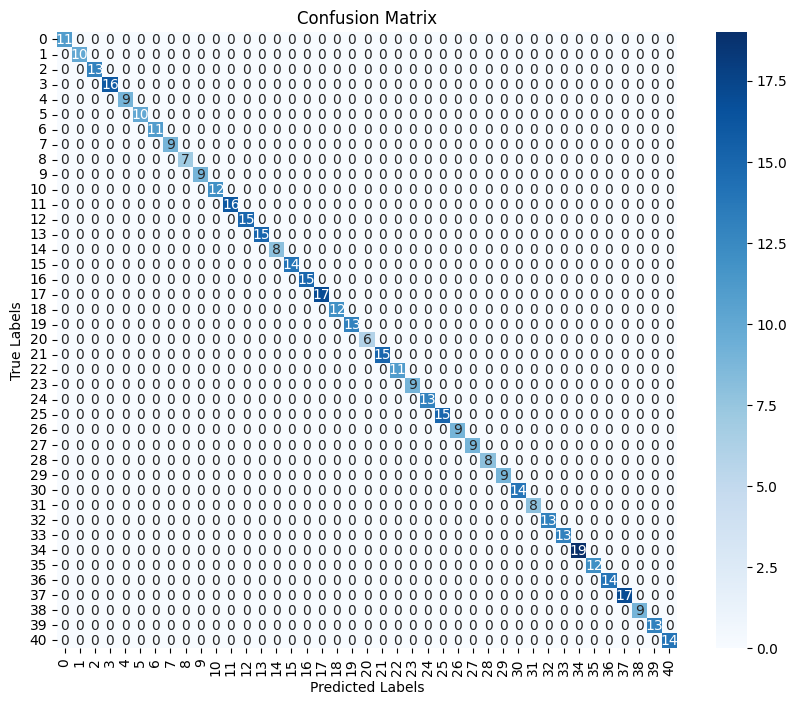

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat confusion matrix
cm = confusion_matrix(y_true_labels_encoded, y_pred_labels)

# Menentukan label kelas
class_labels = label_encoder.classes_

# Mengatur ukuran gambar
plt.figure(figsize=(10, 8))

# Menggambar confusion matrix dengan heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Mengatur label sumbu x dan y
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Menampilkan judul
plt.title('Confusion Matrix')

# Menampilkan gambar
plt.show()


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Konversi data training dan testing menjadi numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Inisialisasi dan latih model KNN
k = 3  # Jumlah tetangga terdekat yang dipertimbangkan
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Prediksi label kelas untuk data testing
y_pred = knn_model.predict(X_test)

# Hitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


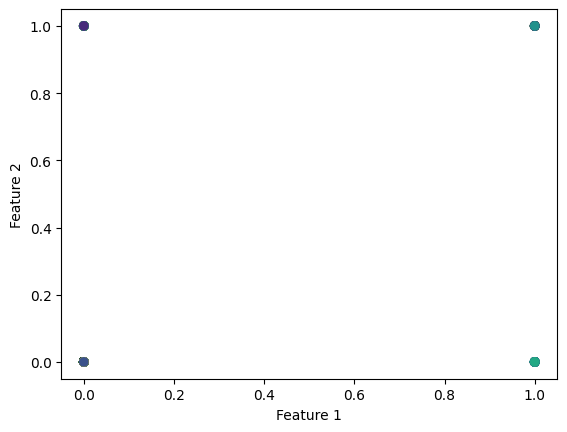

In [56]:
import matplotlib.pyplot as plt

# Mengubah label kelas prediksi menjadi numerik
label_encoder = LabelEncoder()
y_pred_labels_encoded = label_encoder.fit_transform(y_pred_labels)

# Memilih dua fitur untuk divisualisasikan
feature1 = X_test[:, 0]
feature2 = X_test[:, 1]

# Memplot titik-titik data dengan warna yang sesuai dengan kelas prediksi
plt.scatter(feature1, feature2, c=y_pred_labels_encoded, cmap='viridis')

# Menambahkan keterangan sumbu x dan y
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Menampilkan plot
plt.show()
